In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("ml_brief_hous_analys/data_hous.csv")
df_test = pd.read_csv("ml_brief_hous_analys/test_data_hous.csv")



In [5]:
df_test.head()

,prix,chambres,sd_bain,srf_de_vie,srf_total,etages,vue_mer,qual_vue,qual_global,srf_soussol,annee_renov,zipcode,lat,long,srf_de_vie15,srf_total15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,400,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,0,1987,98074,47.6168,-122.045,1800,7503


In [6]:
cor1 = df_test.corr()
print(cor1['prix'].sort_values(ascending=False))

prix            1.000000
srf_de_vie      0.701993
qual_global     0.667496
srf_de_vie15    0.584688
sd_bain         0.525453
qual_vue        0.396933
srf_soussol     0.323552
chambres        0.309007
lat             0.306057
vue_mer         0.266961
etages          0.256278
annee_renov     0.105002
srf_total       0.088895
srf_total15     0.082038
long            0.020571
zipcode        -0.052171
Name: prix, dtype: float64


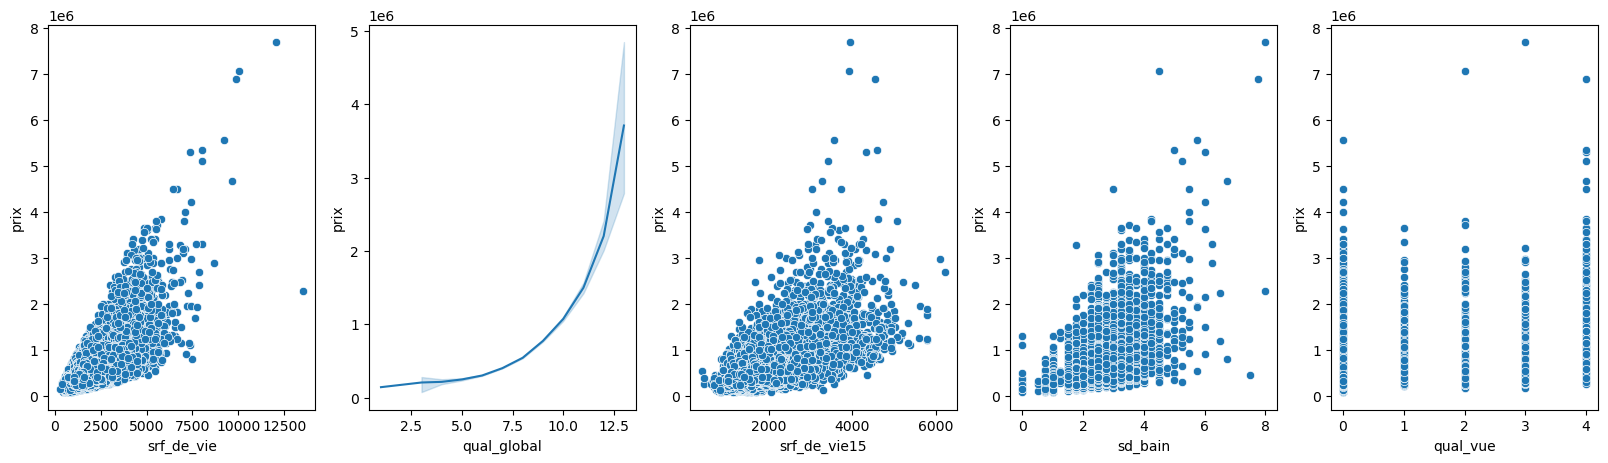

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.scatterplot(x='srf_de_vie', y='prix', data=df_test, ax=axes[0])
sns.lineplot(x='qual_global', y='prix', data=df_test, ax=axes[1])
sns.scatterplot(x='srf_de_vie15', y='prix', data=df_test, ax=axes[2])
sns.scatterplot(x='sd_bain', y='prix', data=df_test, ax=axes[3])
sns.scatterplot(x='qual_vue', y='prix', data=df_test, ax=axes[4])
 
plt.show()

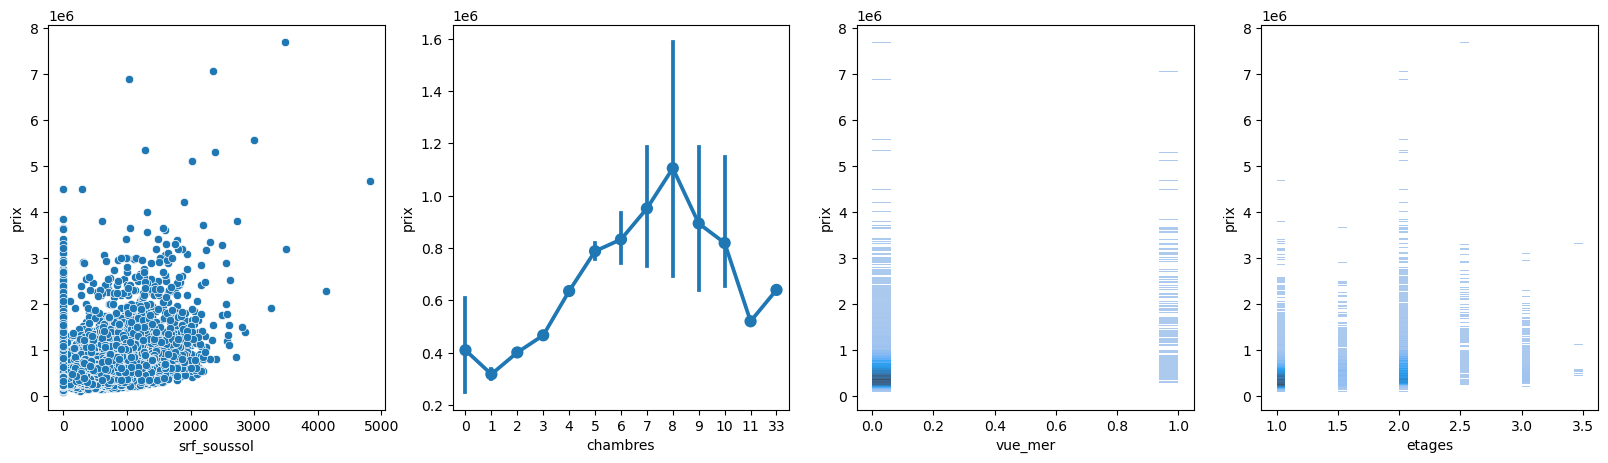

In [422]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.scatterplot(x='srf_soussol', y='prix', data=df_test, ax=axes[0])
sns.pointplot(x='chambres', y='prix', data=df_test, ax=axes[1])
sns.histplot(x='vue_mer', y='prix', data=df_test, ax=axes[2])
sns.histplot(x='etages', y='prix', data=df_test, ax=axes[3])

plt.show()

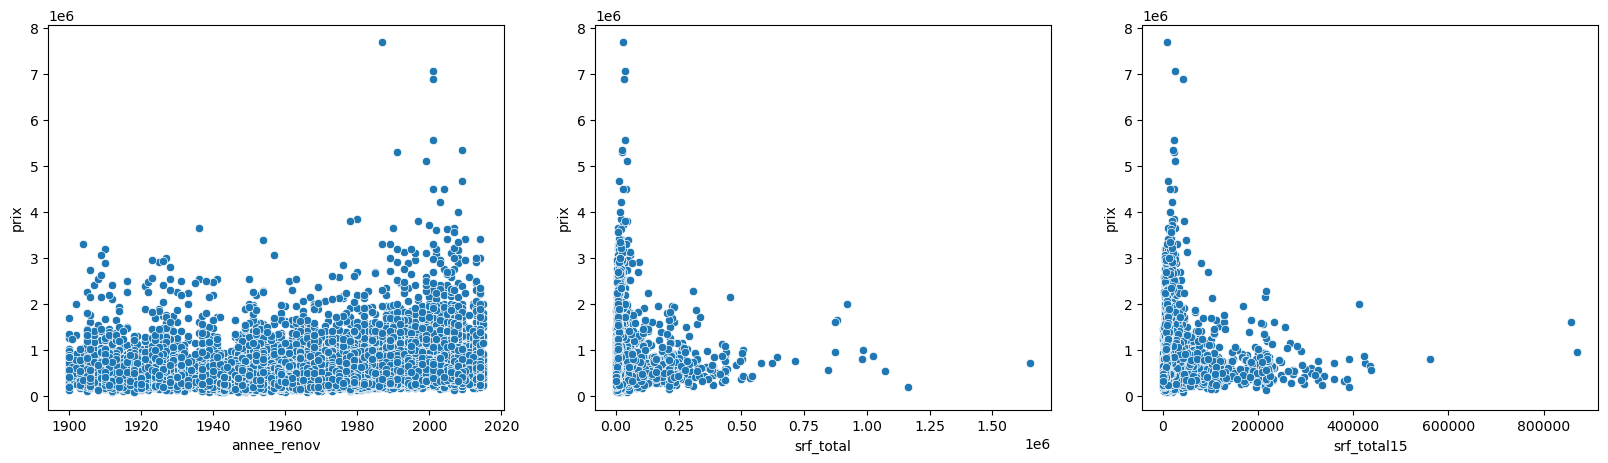

In [437]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x='annee_renov', y='prix', data=df_test, ax=axes[0])
sns.scatterplot(x='srf_total', y='prix', data=df_test, ax=axes[1])
sns.scatterplot(x='srf_total15', y='prix', data=df_test, ax=axes[2])

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

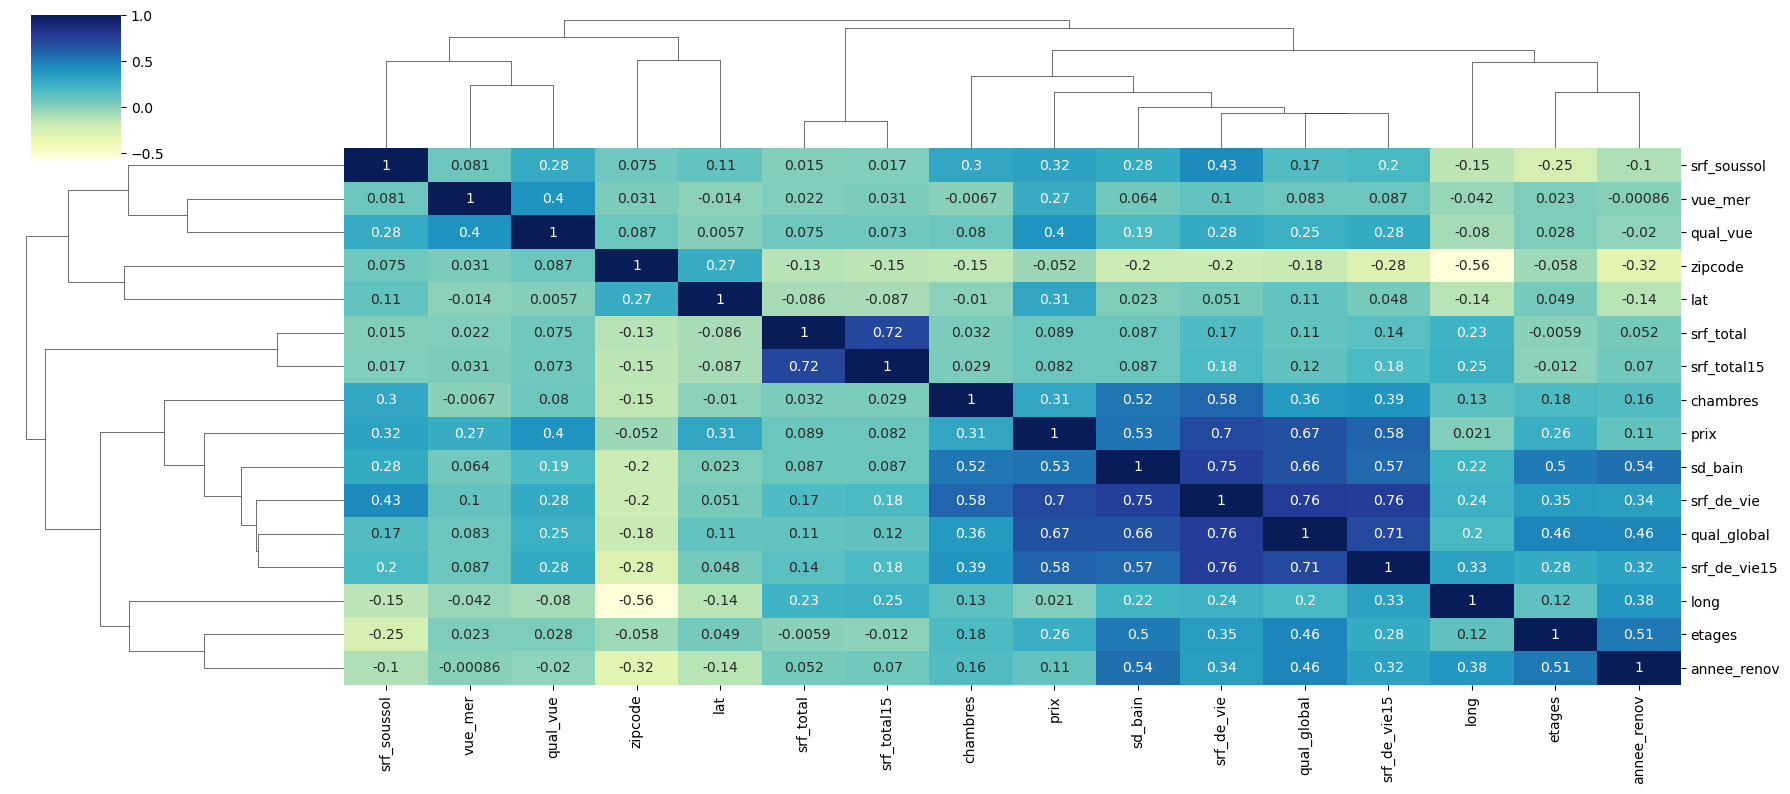

In [8]:
sns.clustermap(cor1, cmap='YlGnBu', annot=True, figsize=(18, 8))
plt.show

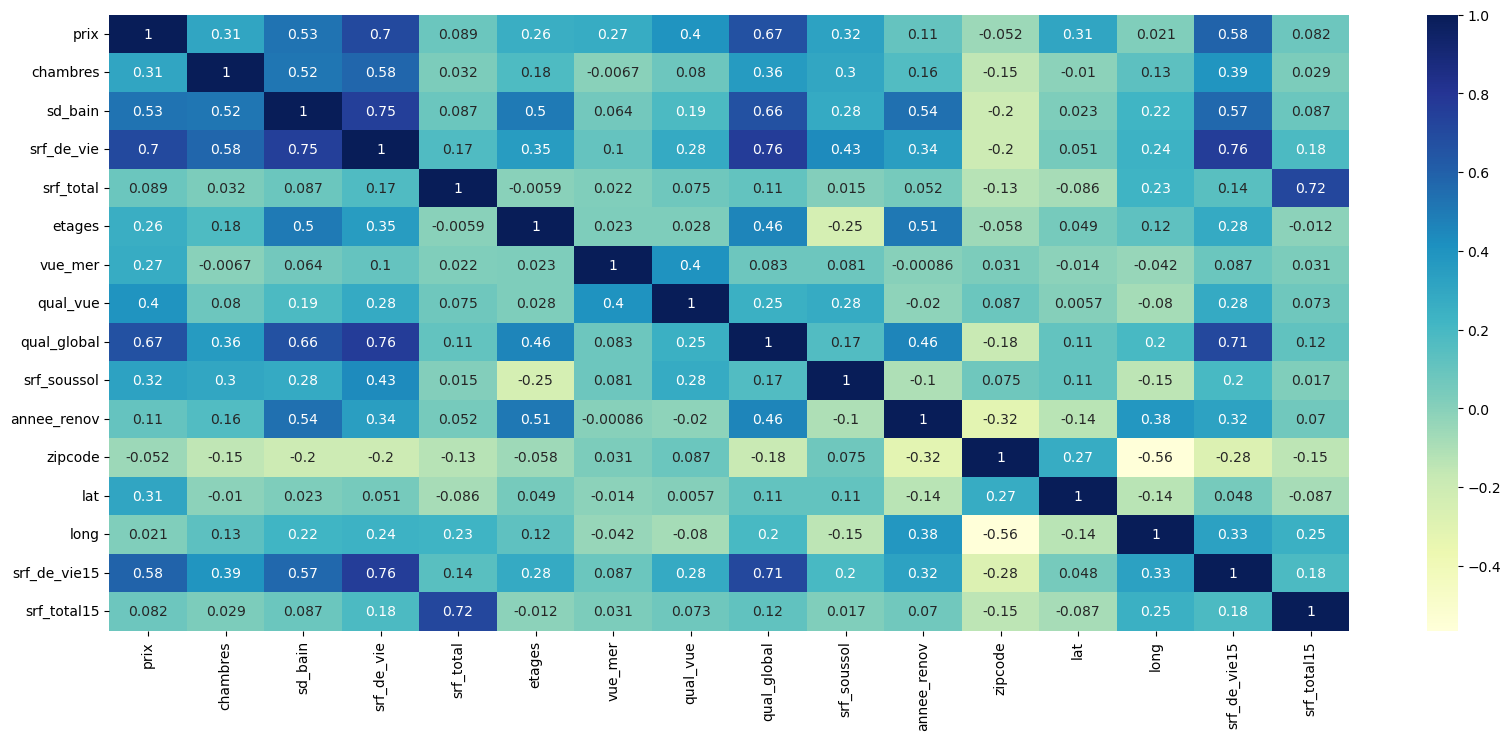

In [440]:
plt.figure(figsize=(20, 8))
sns.heatmap(cor1, cmap='YlGnBu',annot=True)
plt.show()

In [9]:
print(cor1['prix'].sort_values(ascending=False))

prix            1.000000
srf_de_vie      0.701993
qual_global     0.667496
srf_de_vie15    0.584688
sd_bain         0.525453
qual_vue        0.396933
srf_soussol     0.323552
chambres        0.309007
lat             0.306057
vue_mer         0.266961
etages          0.256278
annee_renov     0.105002
srf_total       0.088895
srf_total15     0.082038
long            0.020571
zipcode        -0.052171
Name: prix, dtype: float64


In [314]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [212]:
X = df_test[['srf_de_vie','chambres','qual_global',"srf_de_vie15"]]
y = df_test['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

model = LinearRegression()

scores = cross_val_score(model, X_train_min_max, y_train, cv=5)

print(scores)
print(scores.mean())




[0.55186618 0.53987643 0.53056426 0.53690793 0.53415616]
0.5386741921154348


In [216]:
X = df_test[['srf_de_vie','chambres','qual_global',"srf_de_vie15"]]
y = df_test['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

model = KNeighborsRegressor(n_neighbors=13)

scores = cross_val_score(model, X_train_min_max, y_train, cv=5)

print(scores)
print(scores.mean())



[0.60736215 0.58381268 0.57422141 0.59914585 0.59174675]
0.5912577662643765


In [221]:
df_test['prix'].describe().astype(int)

count      21436
mean      540529
std       367689
min        75000
25%       322150
50%       450000
75%       645000
max      7700000
Name: prix, dtype: int64

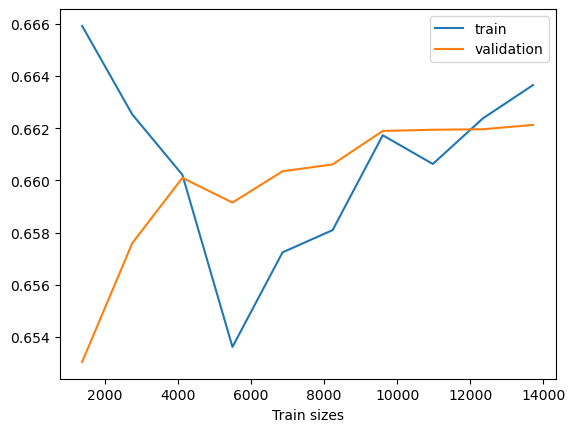

In [496]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","qual_global", "qual_vue","lat",'long',"vue_mer"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)


minmax = MinMaxScaler()
knn_5 = KNeighborsRegressor(weights='distance', n_neighbors=12)

pipe = Pipeline([
     ('minmax', minmax),
     ('knn', knn_5)
])

trained_pipe = pipe.fit(X_train,y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test,y_test)


N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0,10), cv=5)
plt.plot(N,train_score.mean(axis=1), label="train")
plt.plot(N,val_score.mean(axis=1), label = 'validation')
plt.xlabel("Train sizes")
plt.legend()


In [354]:
df_test.head()

,prix,chambres,sd_bain,srf_de_vie,srf_total,etages,vue_mer,qual_vue,qual_global,srf_soussol,annee_renov,zipcode,lat,long,srf_de_vie15,srf_total15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,400,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,0,1987,98074,47.6168,-122.045,1800,7503


In [387]:
new_house = [[1680, 3, 98074, 8, 0, 47.6168, -122.046, 0, 8080]]
prediction = trained_pipe.predict(new_house)
print("prix réel de la maison  : 510000.0 | Prediction : ",prediction.round(1))

prix réel de la maison  : 510000.0 | Prediction :  [522797.8]


/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [457]:
param_grid = {'n_neighbors': np.arange(1,100),
              'weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']})

In [459]:
grid.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","zipcode","qual_global","sd_bain","qual_vue"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

numeric_features = ["srf_de_vie","chambres", "sd_bain"]
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),  
])
categorial_features = ["zipcode"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = LinearRegression()

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

pipe.fit(X_train, y_train)


In [293]:
pipe.predict(X_test)
pipe.score(X_test, y_test)

0.7958316845192757

In [ ]:
df_test.head()
print(cor1['prix'].sort_values(ascending=False))

In [370]:
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","zipcode","qual_global", "qual_vue", "sd_bain","vue_mer","srf_total"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

numeric_features = ["srf_de_vie", "chambres","sd_bain","vue_mer","srf_total"]
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler())
])
categorial_features = ["zipcode","qual_global","qual_vue"]
preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)

model = Ridge(alpha=1) 

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])  

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.score(X_test, y_test)


0.835010095278599

In [322]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0,10), cv=5)


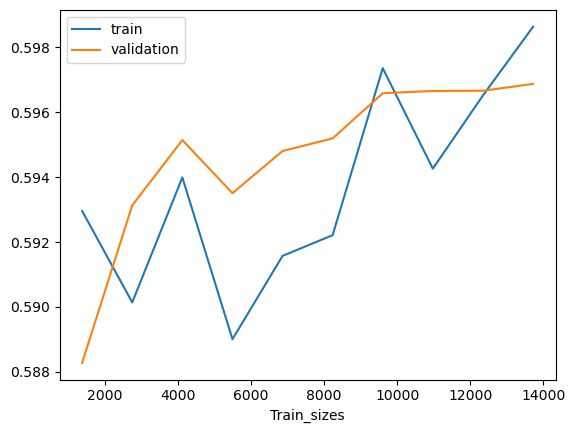

In [323]:
plt.plot(N,train_score.mean(axis=1), label="train")
plt.plot(N,val_score.mean(axis=1), label = 'validation')
plt.xlabel("Train_sizes")
plt.legend()

In [281]:
from sklearn.linear_model import Ridge
y = df_test['prix']
X = df_test[["srf_de_vie","chambres","zipcode","qual_global"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

numeric_features = ["srf_de_vie", "chambres"]
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler())
])
categorial_features = ["zipcode", "qual_global"]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    remainder="passthrough",
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
        
    ]
)

model = Lasso(alpha=1)  
pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

trained_pipe = pipe.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)


/home/apprenant/miniconda3/envs/machinlearn/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15926129430826.938, tolerance: 233140360277.30902
  model = cd_fast.sparse_enet_coordinate_descent(


0.7957538659541444